# Dbscan
developer: Mohammad mehdi Sahraei
***
[maktabkhooneh](https://maktabkhooneh.org/course/%DB%8C%D8%A7%D8%AF%DA%AF%DB%8C%D8%B1%DB%8C-%D9%85%D8%A7%D8%B4%DB%8C%D9%86-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-mk1318/)


### importing

In [8]:
import pandas as pd
import sklearn.utils
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading the data with pandas


In [19]:
df = pd.read_csv('customer.csv')
print(df.shape)
df.head(5)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [23]:
# df['Gender'].value_counts()
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Cleaning data


In [27]:
# df.columns
cdf = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

- Because some data columns are not continuous type, we have to make them numerical and continuous

In [45]:
#First we should convert pd to np 
data = cdf[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].values

print(data[:4])

[[1 'Male' 19 15 39]
 [2 'Male' 21 15 81]
 [3 'Female' 20 16 6]
 [4 'Female' 23 16 77]]


In [46]:
from sklearn import preprocessing

#We must convert these Values to numerical values
cust_ = preprocessing.LabelEncoder()
cust_.fit(['Male','Female'])
data[:,1] = cust_.transform(data[:,1]) 

In [47]:
data[:5]

array([[1, 1, 19, 15, 39],
       [2, 1, 21, 15, 81],
       [3, 0, 20, 16, 6],
       [4, 0, 23, 16, 77],
       [5, 0, 31, 17, 40]], dtype=object)

### converting np to pd

In [212]:
cell_df = pd.DataFrame(data, columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)'])
# cell_df.head()

In [213]:
cell_df.dtypes

CustomerID                object
Gender                    object
Age                       object
Annual Income (k$)        object
Spending Score (1-100)    object
dtype: object

- converting a column to int or etc

In [214]:
cell_df['CustomerID'] = cell_df['CustomerID'].astype('int')
cell_df['Gender'] = cell_df['Gender'].astype('int')
cell_df['Age'] = cell_df['Age'].astype('int')
cell_df['Annual Income (k$)'] = cell_df['Annual Income (k$)'].astype('int')
cell_df['Spending Score (1-100)'] = cell_df['Spending Score (1-100)'].astype('int')

In [215]:
print(cell_df.dtypes)
cell_df.head()

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Clustering

- #### normalizing data

In [216]:
sklearn.utils.check_random_state(1000)

Cust_dataSet = cell_df[['Gender', 'Age']]
Cust_dataSet = StandardScaler().fit_transform(Cust_dataSet)

In [164]:
Cust_dataSet[:20]

array([[ 1.12815215, -1.42456879],
       [ 1.12815215, -1.28103541],
       [-0.88640526, -1.3528021 ],
       [-0.88640526, -1.13750203],
       [-0.88640526, -0.56336851],
       [-0.88640526, -1.20926872],
       [-0.88640526, -0.27630176],
       [-0.88640526, -1.13750203],
       [ 1.12815215,  1.80493225],
       [-0.88640526, -0.6351352 ],
       [ 1.12815215,  2.02023231],
       [-0.88640526, -0.27630176],
       [-0.88640526,  1.37433211],
       [-0.88640526, -1.06573534],
       [ 1.12815215, -0.13276838],
       [ 1.12815215, -1.20926872],
       [-0.88640526, -0.27630176],
       [ 1.12815215, -1.3528021 ],
       [ 1.12815215,  0.94373197],
       [-0.88640526, -0.27630176]])

- #### Making Model

In [217]:
db = DBSCAN(eps=0.15, min_samples=5).fit(Cust_dataSet)
labels = db.labels_

- insert in df

In [218]:
cell_df["cluster"]=labels 
labels[30:40]

array([4, 1, 3, 0, 1, 1, 1, 1, 1, 1])

In [219]:
cell_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


- #### detecting outliers

In [220]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[50:100]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

- #### Number of clusters in labels, ignoring noise if present

In [221]:
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0) 
clusterNum = len(set(labels)) 

realClusterNum

6

### Visualization of clusters

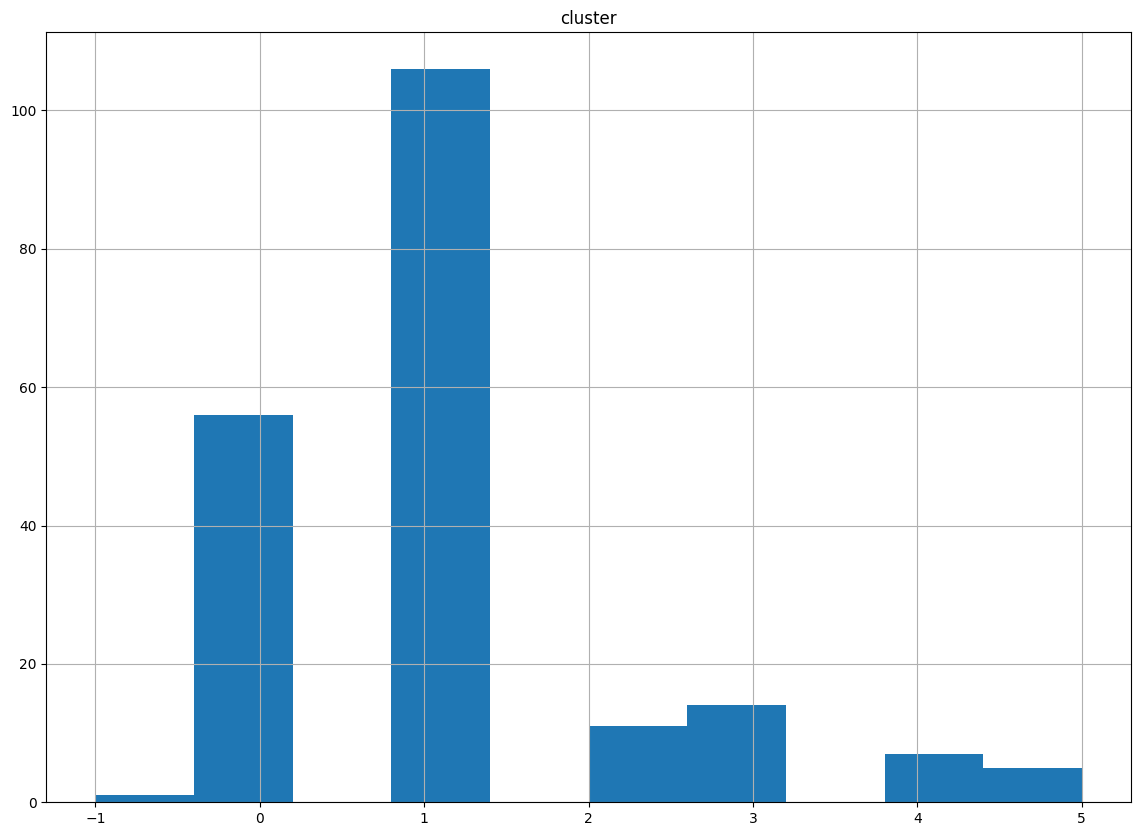

In [223]:
df_hist = cell_df[['cluster']]
df_hist.hist()
plt.show()